# Tutorial 4

## Mean Squared Displacement (MSD)


As an atom travels it is interrupted by collisions with other atoms and this prevents it from travelling in a straight line. In the end the particle moves in a way resembling a random walk. In mathmatics a random walk is a series of steps, where each step is taken in a random direction. Albert Einstein showed that the mean square of the distance travelled by an atom following a random walk is proportional to the time elapsed. This relationship can be written as 



In [1]:
from polypy import read as rd
from polypy import msd as msd
from polypy import utils as ut
from polypy import write as wr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
sns.set_style("ticks")

In [2]:
timestep = 0.1

In [3]:
#data = rd.read_history("example_data/HISTORY", ["F"])
data = rd.read_history("../../../OLD/data/HISTORY_F", ["F"])

In [5]:
msd_data = msd.msd(data, timestep)

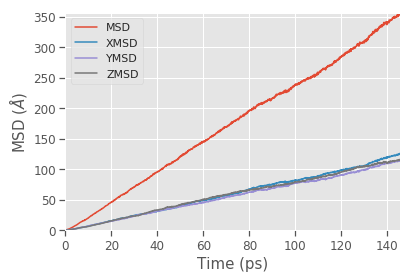

In [6]:
wr.msd_plot(msd_data, set_style="ggplot")

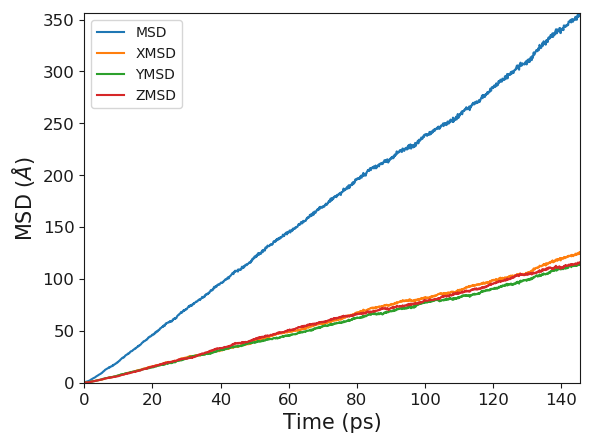

In [7]:
wr.msd_plot(msd_data, output="MSD_Theory.png")

In [ ]:
Diff = ut.linear_regression(msd_data['time'], msd_data['msd'])
Diffusion_Coefficient = ut.three_d_diffusion_coefficient(Diff)

XDiff = ut.linear_regression(msd_data['time'], msd_data['xmsd'])
XDiffusion_Coefficient = ut.three_d_diffusion_coefficient(XDiff)

YDiff = ut.linear_regression(msd_data['time'], msd_data['ymsd'])
YDiffusion_Coefficient = ut.three_d_diffusion_coefficient(YDiff)

ZDiff = ut.linear_regression(msd_data['time'], msd_data['zmsd'])
ZDiffusion_Coefficient = ut.three_d_diffusion_coefficient(ZDiff)

In [ ]:
print("Three Dimensional Diffusion Coefficient", Diffusion_Coefficient, "")
print("One Dimensional Diffusion Coefficient in X", XDiffusion_Coefficient)
print("One Dimensional Diffusion Coefficient in Y", YDiffusion_Coefficient)
print("One Dimensional Diffusion Coefficient in Z", ZDiffusion_Coefficient)


In [ ]:
volume, time = ut.system_volume(data, timestep)
wr.volume_plot(time, volume)
Average_Volume = np.mean(volume[100:])

In [ ]:
Number_of_Charge_Carriers = data['natoms']

In [ ]:
Ionic_Conductivity = ut.conductivity(Number_of_Charge_Carriers, Average_Volume, Diffusion_Coefficient, 700)

In [ ]:
print("Ionic Conductivity :", Ionic_Conductivity)